<a href="https://colab.research.google.com/github/AmirGhnbr/House_Price_Pred_Tensorflow/blob/dev_branch/House_Price_Pred_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [20]:
# lets take a look at tensorflow version
print(tf.__version__)

2.8.2


In [21]:
# import our data
initial_data_train = pd.read_csv("https://raw.githubusercontent.com/AmirGhnbr/house-price-prediction/main/train.csv")
initial_data_test = pd.read_csv("https://raw.githubusercontent.com/AmirGhnbr/house-price-prediction/main/test.csv")
initial_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
initial_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
initial_data_train.isna().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [24]:
initial_data_train.dtypes.head(10)

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

In [25]:
initial_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## We have numeric and categoric data so we need to convert categoric data into numeric

### using pandas get_dummies function

In [34]:
# one hot encode the data
train_one_hot = pd.get_dummies(initial_data_train)
train_one_hot.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [35]:
X = train_one_hot.drop(["SalePrice"],axis=1)
y = train_one_hot["SalePrice"]
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [36]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Split the data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train= X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)
y_train.isna().sum()

0

## Create the first model and then improve it

In [38]:
tf.random.set_seed(42)

# create the basic structure of model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model which means specifying how model works
model_1.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                metrics=['mae'])

# fitting the model into the train data
model_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 124992.9844 - mae: 124992.9844
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 156550.3281 - mae: 156550.3281
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 137251.3281 - mae: 137251.3281
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 133897.5781 - mae: 133897.5781
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 131890.8281 - mae: 131890.8281
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 125211.1094 - mae: 125211.1094
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 126995.3047 - mae: 126995.3047
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 143999.6250 - mae: 143999.6250
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: 137290.3750 - mae: 137290.3750
Epoch 10/20
37/37 [==============================] - 0s 2ms/step - loss: 

In [39]:
model_1.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 133263.9219 - mae: 133263.9219


[133263.921875, 133263.921875]

In [52]:
model_1_pred = model_1.predict(X_test)
model_1_pred[:10]

array([[  1.1939409 ],
       [-13.101733  ],
       [  0.47720528],
       [ -0.6825598 ],
       [ -9.740351  ],
       [  7.3897276 ],
       [ -4.5530577 ],
       [ -1.9616714 ],
       [  8.227073  ],
       [ -1.30368   ]], dtype=float32)

### To imporve the model performance we can take these steps:

1. scale the inpute data
2. make the network deeper
3. change the hidden units
4. change the activation function
5. regularizatin & dropout & early stopping for fighting againts overfitting
5. use better optimizer
6. use better loss function
7. use mini_batch
8. train for loger(increase the number of epochs)

In [40]:
def plot_model_performance(model_history):
  pd.DataFrame(model_history.history).plot()
  plt.grid(True)
  plt.xlabel("loss")
  plt.ylabel("epoch")

In [41]:
# scale the dataset using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
## model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

## compile the model
model_2.compile(loss = tf.keras.losses.huber,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "mse")

## fit the model to train data
history = model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
37/37 [==============================] - 1s 3ms/step - loss: 181434.5781 - mse: 38883205120.0000
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 181391.4062 - mse: 38867091456.0000
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 181212.4375 - mse: 38799101952.0000
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 180704.7969 - mse: 38606454784.0000
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 179614.7188 - mse: 38190870528.0000
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 177681.4219 - mse: 37459865600.0000
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 174627.8281 - mse: 36339871744.0000
Epoch 8/200
37/37 [==============================] - 0s 3ms/step - loss: 170235.6094 - mse: 34745757696.0000
Epoch 9/200
37/37 [==============================] - 0s 3ms/step - loss: 164241.8125 - mse: 32671279104.0000
Epoch 10/200
37/37 

In [43]:
model_2.evaluate(X_test , y_test)

10/10 [==============================] - 0s 2ms/step - loss: 20376.8555 - mse: 972610432.0000


[20376.85546875, 972610432.0]

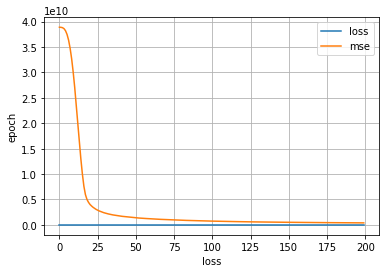

In [44]:
plot_model_performance(history)

### As we expected the model is overfitting the training data so we need to use regularizatin & dropout & early stopping